<a href="https://colab.research.google.com/github/Furkan-Coskun/NLP/blob/master/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [5]:
strategy = tf.distribute.TPUStrategy(resolver)

### Data Wrangling

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df1 = df.copy()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
df.Rating.value_counts(dropna=False)

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [10]:
df["Recommended IND"].value_counts(dropna=False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [11]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

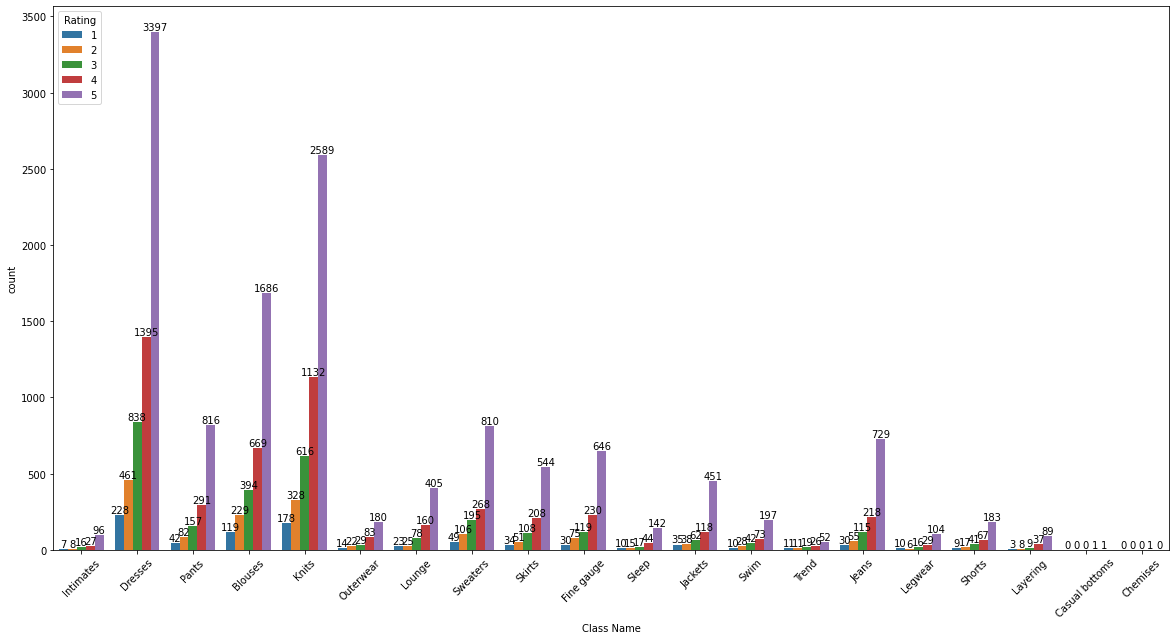

In [12]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(data = df, x ="Class Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

<AxesSubplot:xlabel='Rating', ylabel='Recommended IND'>

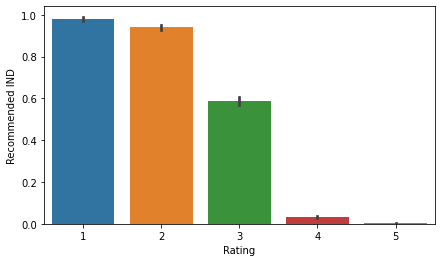

In [13]:
sns.barplot(data = df, x = "Rating", y = "Recommended IND")


In [14]:
df[["Review Text","Recommended IND"]]

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
23481,I was very happy to snag this dress at such a ...,0
23482,"It reminds me of maternity clothes. soft, stre...",0
23483,"This fit well, but the top was very see throug...",1
23484,I bought this dress for a wedding i have this ...,0


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [15]:
df.rename(columns={'Review Text': 'text', 'Recommended IND': 'score'}, inplace=True)

In [16]:
df["text"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                        

### Missing Value Detection

In [17]:
df[df["text"].isna()]

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,score,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,0,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,0,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,0,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,0,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,0,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...,...
23258,23258,862,35,NaN,NaN,4,0,0,General,Tops,Knits
23301,23301,862,52,NaN,NaN,5,0,0,General,Tops,Knits
23303,23303,823,46,NaN,NaN,5,0,0,General,Tops,Blouses
23470,23470,1104,39,NaN,NaN,5,0,0,General Petite,Dresses,Dresses


In [18]:
df[df["text"].isna()]["Rating"].value_counts()

5    591
4    169
3     48
1     21
2     16
Name: Rating, dtype: int64

In [19]:
df[df["text"].isna()]["score"].value_counts()

0    774
1     71
Name: score, dtype: int64

In [20]:
df.drop(index = df[df["text"].isna()].index, inplace = True)

In [21]:
df.reset_index(drop = True, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    19675 non-null  object
 4   text                     22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   score                    22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


In [23]:
df = df[["text","score"]]

In [24]:
df

,text,score
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
22636,I was very happy to snag this dress at such a ...,0
22637,"It reminds me of maternity clothes. soft, stre...",0
22638,"This fit well, but the top was very see throug...",1
22639,I bought this dress for a wedding i have this ...,0


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [25]:
df.text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

In [26]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [27]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
                            "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
                            'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn',
                            "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words = stopwords.words('english')


In [29]:
for i in negative_auxiliary_verbs:
       if i in stop_words:
            stop_words.remove(i)
        

In [30]:
list(stop_words)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def cleaning(data):
    
         
    #1. Tokenize and lower
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #5. joining
    return " ".join(text_cleaned)

In [32]:
df.text.apply(cleaning)

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22638    fit well top see never would worked glad able ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 22641, dtype: object

In [33]:
cleaning_text = df["text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [34]:
from wordcloud import WordCloud

In [35]:
positive_text = df[df["score"] == 0]["text"]
positive_text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
22635    So i wasn't sure about ordering this skirt bec...
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 18540, dtype: object

In [36]:
negative_text = df[df["score"] == 1]["text"]
negative_text

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [37]:
positive_text = df[df["score"] == 0]["text"].apply(cleaning)

In [38]:
negative_text = df[df["score"] == 1]["text"].apply(cleaning)

In [39]:
positive_reviews = positive_text
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    sure ordering skirt could see person first gla...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [40]:
positive_words = " ".join(positive_reviews)

In [41]:
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [42]:
negative_reviews = negative_text
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper would p...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun want pair pant l...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked glad able ...
Name: text, Length: 4101, dtype: object

In [43]:
negative_words = " ".join(negative_reviews)

In [44]:
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [45]:
#!pip install wordcloud

In [46]:
worldcloud_pos = WordCloud(background_color="white", max_words =250)

In [47]:
worldcloud_pos.generate(positive_words)


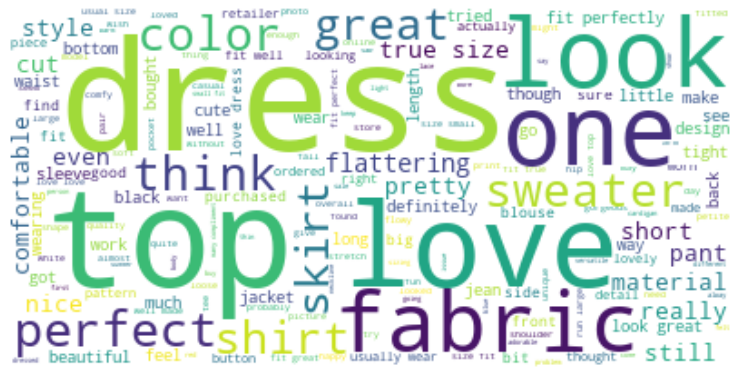

In [48]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
worldcloud_neg = WordCloud(background_color="white", max_words =250)
worldcloud_neg.generate(negative_words)

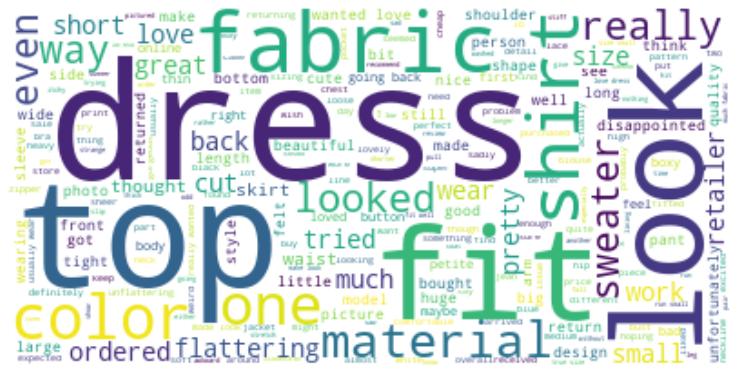

In [50]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df["text"]
y = df["score"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [56]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20374,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [59]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [62]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.144783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

### CountVectorizer

In [64]:
from sklearn. model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[1]),
            'recall': make_scorer(recall_score, average=None, labels = [1]),
            'f1': make_scorer(f1_score, average=None, labels = [1])}

In [65]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.01, max_iter=1000, class_weight= "balanced", random_state=101) 
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [66]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1578  277]
 [  65  345]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1855
           1       0.55      0.84      0.67       410

    accuracy                           0.85      2265
   macro avg       0.76      0.85      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16685
           1       0.58      0.88      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [67]:
model = LogisticRegression(C = 0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848449
train_accuracy     0.860353
test_precision     0.553366
train_precision    0.574598
test_recall        0.848550
train_recall       0.882296
test_f1            0.669813
train_f1           0.695953
dtype: float64

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": [0.01, 0.02, 0.1, 0.2, 0.5, 1]
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.02, 0.1, 0.2, 0.5, 1]},
             scoring='recall', verbose=2)

In [69]:
grid_search.best_params_

{'C': 0.01}

In [70]:
model = LogisticRegression(C = 0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848449
train_accuracy     0.860353
test_precision     0.553366
train_precision    0.574598
test_recall        0.848550
train_recall       0.882296
test_f1            0.669813
train_f1           0.695953
dtype: float64

In [71]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


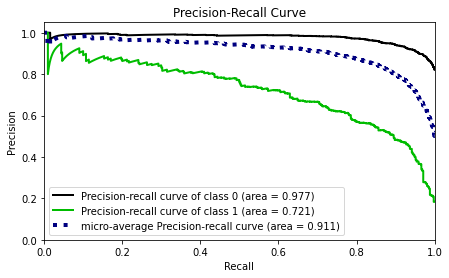

In [72]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.01, max_iter=1000, class_weight= "balanced", random_state=101)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [73]:
y_pred_proba[:, 1]

array([0.42738017, 0.05536184, 0.45290817, ..., 0.81797922, 0.70769612,
       0.28207551])

In [74]:
y_test

21357    0
10387    0
10026    0
1285     1
12597    0
        ..
10025    0
15600    0
1576     1
20573    0
22422    0
Name: score, Length: 2265, dtype: int64

In [75]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [76]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [77]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1547  308]
 [  59  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1855
           1       0.53      0.86      0.66       410

    accuracy                           0.84      2265
   macro avg       0.75      0.85      0.78      2265
weighted avg       0.89      0.84      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     16685
           1       0.55      0.88      0.68      3691

    accuracy                           0.85     20376
   macro avg       0.76      0.86      0.79     20376
weighted avg       0.89      0.85      0.86     20376



In [78]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.841774
train_accuracy     0.849572
test_precision     0.539722
train_precision    0.553048
test_recall        0.863453
train_recall       0.884042
test_f1            0.664182
train_f1           0.680425
dtype: float64

In [79]:
param_grid = {
    "C": [0.01, 0.02, 0.1, 0.2, 0.5, 1]
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_tf_idf,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.02, 0.1, 0.2, 0.5, 1]},
             scoring='recall', verbose=2)

In [80]:
grid_search.best_params_

{'C': 0.1}

In [81]:
model = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.847958
train_accuracy     0.857823
test_precision     0.551404
train_precision    0.568563
test_recall        0.865622
train_recall       0.892020
test_f1            0.673589
train_f1           0.694473
dtype: float64

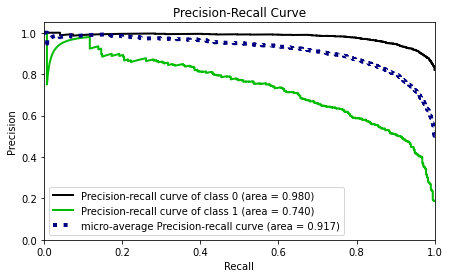

In [82]:


model = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [83]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_AP = average_precision_score(y_test, y_pred_proba[:, 1])

## Naive Bayes 

### Countvectorizer

In [84]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha= 1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [85]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1701  154]
 [ 102  308]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1855
           1       0.67      0.75      0.71       410

    accuracy                           0.89      2265
   macro avg       0.81      0.83      0.82      2265
weighted avg       0.89      0.89      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     16685
           1       0.70      0.80      0.74      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.86      0.84     20376
weighted avg       0.91      0.90      0.90     20376



In [86]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883931
train_accuracy     0.902085
test_precision     0.659507
train_precision    0.701816
test_recall        0.742616
train_recall       0.798910
test_f1            0.698581
train_f1           0.747220
dtype: float64

In [87]:
param_grid = {
    "alpha": [1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
}
grid_search = GridSearchCV(MultinomialNB (), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 2.0, 3.0, 5.0, 10.0]},
             scoring='recall', verbose=2)

In [88]:
grid_search.best_params_


{'alpha': 1.0}

In [89]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.882949
train_accuracy     0.901763
test_precision     0.652959
train_precision    0.694981
test_recall        0.755350
train_recall       0.815708
test_f1            0.700398
train_f1           0.750518
dtype: float64

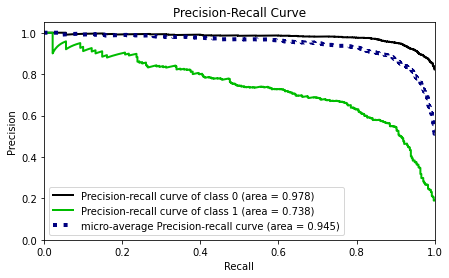

In [90]:
model = MultinomialNB(alpha=1.0)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [91]:
y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [92]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [93]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1695  160]
 [ 102  308]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1855
           1       0.66      0.75      0.70       410

    accuracy                           0.88      2265
   macro avg       0.80      0.83      0.81      2265
weighted avg       0.89      0.88      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16685
           1       0.69      0.81      0.74      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.86      0.84     20376
weighted avg       0.91      0.90      0.90     20376



In [94]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.878828
train_accuracy     0.899266
test_precision     0.642654
train_precision    0.689412
test_recall        0.746144
train_recall       0.807911
test_f1            0.690474
train_f1           0.743965
dtype: float64

In [95]:
param_grid = {
    "alpha": [0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]
}
grid_search = GridSearchCV(BernoulliNB (), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]},
             scoring='recall', verbose=2)

In [96]:
grid_search.best_params_

{'alpha': 0.5}

In [97]:
model = BernoulliNB(alpha=0.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.879515
train_accuracy     0.901229
test_precision     0.643795
train_precision    0.692343
test_recall        0.749936
train_recall       0.818477
test_f1            0.692770
train_f1           0.750138
dtype: float64

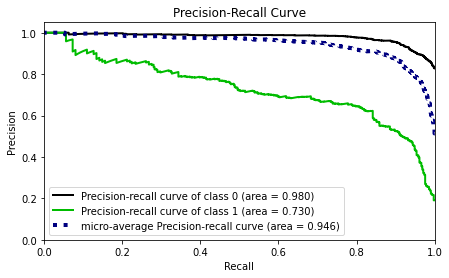

In [98]:
model = BernoulliNB(alpha=0.5)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [99]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_AP = average_precision_score(y_test, y_pred_proba[:, 1])

## Support Vector Machine (SVM)

### Countvectorizer

In [100]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [101]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1577  278]
 [  65  345]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1855
           1       0.55      0.84      0.67       410

    accuracy                           0.85      2265
   macro avg       0.76      0.85      0.78      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16685
           1       0.58      0.88      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [102]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.849087
train_accuracy     0.861144
test_precision     0.554506
train_precision    0.575986
test_recall        0.850990
train_recall       0.884825
test_f1            0.671397
train_f1           0.697758
dtype: float64

In [103]:
param_grid = {'C': 
              [0.001, 0.002, 0.003, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 1]
              }
grid_search = GridSearchCV(LinearSVC(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.002, 0.003, 0.01, 0.02, 0.03, 0.05,
                               0.07, 0.1, 1]},
             scoring='recall', verbose=2)

In [104]:
grid_search.best_params_


{'C': 0.002}

In [105]:
model = LinearSVC(C=0.002, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.857136
train_accuracy     0.871935
test_precision     0.571070
train_precision    0.597794
test_recall        0.851801
train_recall       0.895632
test_f1            0.683604
train_f1           0.717012
dtype: float64

In [106]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.002, class_weight="balanced", random_state=101)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

In [107]:
decision_function

array([-0.11826048, -1.171636  , -0.08806457, ...,  0.70488953,
        0.31972739, -0.35429103])

In [108]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
svc_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
svc_count_AP = average_precision_score(y_test, decision_function)

### TD-IDF

In [109]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [110]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1591  264]
 [  52  358]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1855
           1       0.58      0.87      0.69       410

    accuracy                           0.86      2265
   macro avg       0.77      0.87      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     16685
           1       0.60      0.91      0.72      3691

    accuracy                           0.87     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [111]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.857479
train_accuracy     0.873500
test_precision     0.570783
train_precision    0.599214
test_recall        0.863453
train_recall       0.911045
test_f1            0.687104
train_f1           0.722934
dtype: float64

In [112]:
param_grid = {'C': 
              [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 10]
              }
grid_search = GridSearchCV(LinearSVC(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_tf_idf, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 10]},
             scoring='recall', verbose=2)

In [113]:
grid_search.best_params_


{'C': 0.01}

In [114]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845848
train_accuracy     0.855822
test_precision     0.547187
train_precision    0.564343
test_recall        0.868603
train_recall       0.895030
test_f1            0.671322
train_f1           0.692218
dtype: float64

In [115]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

In [116]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_AP = average_precision_score(y_test, decision_function)

## Random Forest

### Countvectorizer

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 7, random_state = 42, class_weight="balanced",n_jobs = -1) 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [118]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1538  317]
 [  81  329]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1855
           1       0.51      0.80      0.62       410

    accuracy                           0.82      2265
   macro avg       0.73      0.82      0.75      2265
weighted avg       0.87      0.82      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     16685
           1       0.54      0.86      0.67      3691

    accuracy                           0.84     20376
   macro avg       0.75      0.85      0.78     20376
weighted avg       0.89      0.84      0.86     20376



In [119]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs= -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring =  scoring, cv = 10, return_train_score=True, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.827690
train_accuracy     0.846132
test_precision     0.516130
train_precision    0.548154
test_recall        0.813598
train_recall       0.861646
test_f1            0.631227
train_f1           0.669923
dtype: float64

In [120]:
param_grid = {"n_estimators":[50, 75, 100],
              "max_depth": [5, 7, 10, 15, 30]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15, 30],
                         'n_estimators': [50, 75, 100]},
             scoring='recall', verbose=2)

In [121]:
grid_search.best_params_


{'max_depth': 7, 'n_estimators': 100}

In [122]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs= -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring =  scoring, cv = 10, return_train_score=True, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.820868
train_accuracy     0.830149
test_precision     0.504010
train_precision    0.519313
test_recall        0.819020
train_recall       0.849725
test_f1            0.623722
train_f1           0.644527
dtype: float64

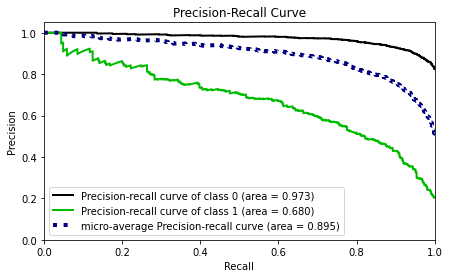

In [123]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [124]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [125]:
rf = RandomForestClassifier(100, max_depth=7, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [126]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1533  322]
 [  79  331]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1855
           1       0.51      0.81      0.62       410

    accuracy                           0.82      2265
   macro avg       0.73      0.82      0.75      2265
weighted avg       0.87      0.82      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     16685
           1       0.54      0.87      0.67      3691

    accuracy                           0.84     20376
   macro avg       0.76      0.86      0.78     20376
weighted avg       0.89      0.84      0.86     20376



In [127]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.821457
train_accuracy     0.844267
test_precision     0.504963
train_precision    0.543589
test_recall        0.813876
train_recall       0.878714
test_f1            0.622852
train_f1           0.671573
dtype: float64

In [128]:
param_grid = {"n_estimators":[10, 50, 75, 100],
              "max_depth": [5, 7, 10, 15, 30, 50]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_tf_idf, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15, 30, 50],
                         'n_estimators': [10, 50, 75, 100]},
             scoring='recall', verbose=2)

In [129]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [130]:
model = RandomForestClassifier(75, max_depth=5, random_state = 42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.801925
train_accuracy     0.817650
test_precision     0.473380
train_precision    0.498574
test_recall        0.806286
train_recall       0.857130
test_f1            0.596058
train_f1           0.630209
dtype: float64

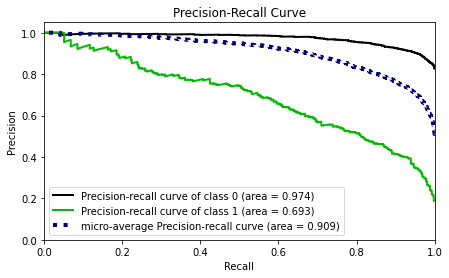

In [131]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [132]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP = average_precision_score(y_test, y_pred_proba[:, 1])

## Ada Boosting

### Countvectorizer

In [133]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [134]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1763   92]
 [ 198  212]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1855
           1       0.70      0.52      0.59       410

    accuracy                           0.87      2265
   macro avg       0.80      0.73      0.76      2265
weighted avg       0.86      0.87      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     16685
           1       0.72      0.52      0.60      3691

    accuracy                           0.88     20376
   macro avg       0.81      0.74      0.76     20376
weighted avg       0.87      0.88      0.87     20376



In [135]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.871810
train_accuracy     0.876903
test_precision     0.703066
train_precision    0.723023
test_recall        0.505552
train_recall       0.519432
test_f1            0.587995
train_f1           0.604534
dtype: float64

In [136]:
#param_grid = {"n_estimators": [75, 100, 250, 400, 500 ], "learning_rate": [0.01, 0.1, 0.5, 1.0, 1.5]}
#grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
#grid_search.fit(X_train_count, y_train)

In [137]:
#grid_search.best_params_

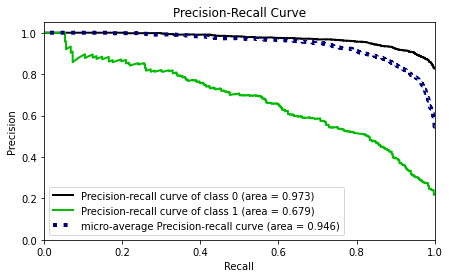

In [138]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [139]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [140]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [141]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1754  101]
 [ 193  217]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1855
           1       0.68      0.53      0.60       410

    accuracy                           0.87      2265
   macro avg       0.79      0.74      0.76      2265
weighted avg       0.86      0.87      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     16685
           1       0.73      0.54      0.62      3691

    accuracy                           0.88     20376
   macro avg       0.82      0.75      0.77     20376
weighted avg       0.87      0.88      0.87     20376



In [142]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870583
train_accuracy     0.879935
test_precision     0.694027
train_precision    0.727219
test_recall        0.511786
train_recall       0.539661
test_f1            0.588772
train_f1           0.619533
dtype: float64

In [143]:
#param_grid = {"n_estimators": [100, 250, 400, 500, ], "learning_rate": [ 0.1, 0.5, 1.0, 1.5]}
#grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
#grid_search.fit(X_train_tf_idf, y_train)

In [144]:
#grid_search.best_params_

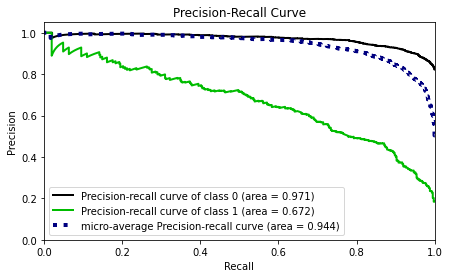

In [145]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [146]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP = average_precision_score(y_test, y_pred_proba[:, 1])

## DL modeling

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [148]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

### Tokenization

In [149]:
num_words = 15001 
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [150]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [151]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [152]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [153]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [165]:
max_tokens = 102

In [154]:
num_tokens.max()

116

In [166]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9564948544675589

### Fixing token counts of all documents (pad_sequences)

In [167]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [168]:
X_pad.shape

(22641, 102)

### Train Set Split

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [190]:
model = Sequential()

In [191]:
embedding_size = 50

In [192]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [193]:
optimizer = Adam(learning_rate=0.001)

In [194]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [195]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 102, 50)           750050    
                                                                 
 dropout_16 (Dropout)        (None, 102, 50)           0         
                                                                 
 gru_12 (GRU)                (None, 102, 50)           15300     
                                                                 
 dropout_17 (Dropout)        (None, 102, 50)           0         
                                                                 
 gru_13 (GRU)                (None, 102, 25)           5775      
                                                                 
 dropout_18 (Dropout)        (None, 102, 25)           0         
                                                                 
 gru_14 (GRU)                (None, 12)               

In [196]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [197]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.76022758, 0.61060833])

In [198]:
model.fit(X_train, y_train, epochs=1, batch_size=128, sample_weight=classes_weights, callbacks=[early_stop],
         validation_data=(X_test, y_test)) # 

160/160 [==============================] - 29s 137ms/step - loss: 0.4866 - recall: 0.8038 - val_loss: 0.3615 - val_recall: 0.8634


In [199]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.486598,0.803847,0.361459,0.863415


In [200]:
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

71/71 [==============================] - 4s 22ms/step
[[1550  305]
 [  56  354]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1855
           1       0.54      0.86      0.66       410

    accuracy                           0.84      2265
   macro avg       0.75      0.85      0.78      2265
weighted avg       0.89      0.84      0.85      2265



In [201]:
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 12s 18ms/step
[[14189  2496]
 [  323  3368]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     16685
           1       0.57      0.91      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.78      0.88      0.81     20376
weighted avg       0.90      0.86      0.87     20376



71/71 [==============================] - 1s 19ms/step


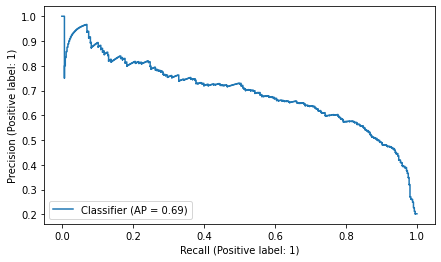

In [203]:
from sklearn.metrics import PrecisionRecallDisplay
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [204]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [205]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.1 MB/s eta 0:00:00


### Read Data

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
# df.head()
# df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})
# df.rename(columns={'Review Text': 'text', 'Recommended IND': 'score'}, inplace=True)

### Train test split

In [211]:
# X = df["text"]
# y = df["score"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Tokenization

In [212]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [213]:
max_tokens = []
for sent in X:  
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_tokens.append(len(input_ids))
print('Max sentence length: ', max(max_tokens))

Max sentence length:  162


In [222]:
np.array(max_tokens).mean()

76.75659202332052

### Transformation Vectors to Matrices

In [223]:
tokens = tokenizer(list(X), max_length=162, truncation=True,
                                    padding='max_length', add_special_tokens=True)
tokens

In [226]:
np.array(tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [227]:
np.array(tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [228]:
def transformation(X):
  seq_len = 162

  tokens = tokenizer(list(X), max_length=max(max_tokens), truncation=True,
                                      padding='max_length', add_special_tokens=True) 

  return np.array(tokens['input_ids']), np.array(tokens['attention_mask'])

In [229]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [230]:
print("Xids_train Shape:", Xids_train.shape)
print("Xmask_train Shape:", Xmask_train.shape)
print("Xids_test Shape:", Xids_test.shape)
print("Xmask_test Shape:", Xmask_test.shape)

Xids_train Shape: (20376, 162)
Xmask_train Shape: (20376, 162)
Xids_test Shape: (2265, 162)
Xmask_test Shape: (2265, 162)


In [231]:
y_train2

13751    1
22238    1
11307    0
5058     0
1942     0
        ..
21930    0
19563    0
19538    0
14153    0
11453    0
Name: score, Length: 20376, dtype: int64

In [235]:
 y_train2 = np.array(y_train2)
 

In [236]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [237]:
 y_test2 = np.array(y_test2)

In [238]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [239]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [240]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [241]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [242]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [243]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [244]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [245]:
batch_size = 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [246]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.2 MB/s eta 0:00:00


In [247]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating optimization

In [249]:
from official.nlp import optimization
epochs = 2
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5 
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model

In [251]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [ ]:
pd.Series(y).value_counts(normalize=True)

### Model Fiting

In [253]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [254]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs) 

Epoch 1/2
637/637 [==============================] - ETA: 0s - loss: 0.5813 - recall_1: 0.8160

KeyboardInterrupt: ignored

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___